In [1]:
import torch

import math
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from diffusion.data_util import get_ckpt_path, show_out_images, get_logger_path, train_plot
from diffusion.script_util import ModelType
from diffusion.modules import UNet, Diffusion
from diffusion.lightning_modules import DiffusionWithModel


c:\Users\niels\anaconda3\envs\bachelor\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model_type = ModelType.cond_embed
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

ckpt_path = get_ckpt_path(model_type, mode='epoch', epoch=0, version_suffix=0)
combined_model = DiffusionWithModel.load_from_checkpoint(ckpt_path).to(device)
unet_model, diffusion = combined_model.extract_models()


In [6]:
x, y = diffusion.sample(unet_model, 4, y=True)
show_out_images(x)


TypeError: randint() received an invalid combination of arguments - got (low=int, high=NoneType, size=tuple, device=torch.device, ), but expected one of:
 * (int high, tuple of ints size, *, torch.Generator generator, Tensor out, torch.dtype dtype, torch.layout layout, torch.device device, bool pin_memory, bool requires_grad)
 * (int high, tuple of ints size, *, Tensor out, torch.dtype dtype, torch.layout layout, torch.device device, bool pin_memory, bool requires_grad)
 * (int low, int high, tuple of ints size, *, torch.Generator generator, Tensor out, torch.dtype dtype, torch.layout layout, torch.device device, bool pin_memory, bool requires_grad)
 * (int low, int high, tuple of ints size, *, Tensor out, torch.dtype dtype, torch.layout layout, torch.device device, bool pin_memory, bool requires_grad)


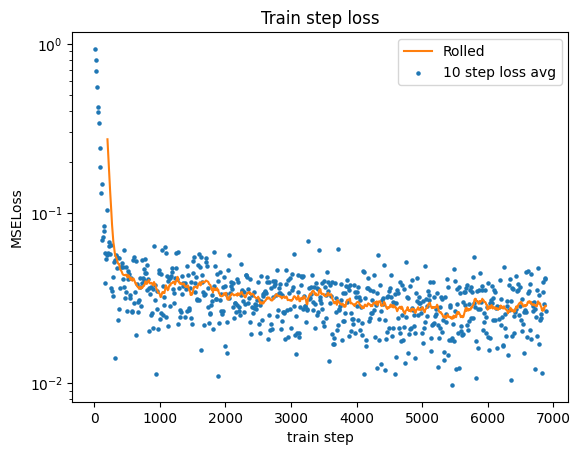

In [ ]:
logger_path = get_logger_path()
df = pd.read_csv(logger_path)

train_plot(df, yscale='log')


In [ ]:
import enum

class ModelType(enum.Enum):
    """
    Which method the model uses to predict
    """

    uncond = 'uncond' # the model generates samples blindly
    cond_embed = 'cond_embed'  # the model generates samples using embeddings
    guided = 'guided'  # the model is guided with gradients from a classifier


In [ ]:
ModelType.uncond.name

'uncond'

In [ ]:
a = ModelType.uncond
a is ModelType.uncond

True

In [ ]:
5 == True

False